## Project Name: Telecom Customer Churn Prediction: Classification Problem

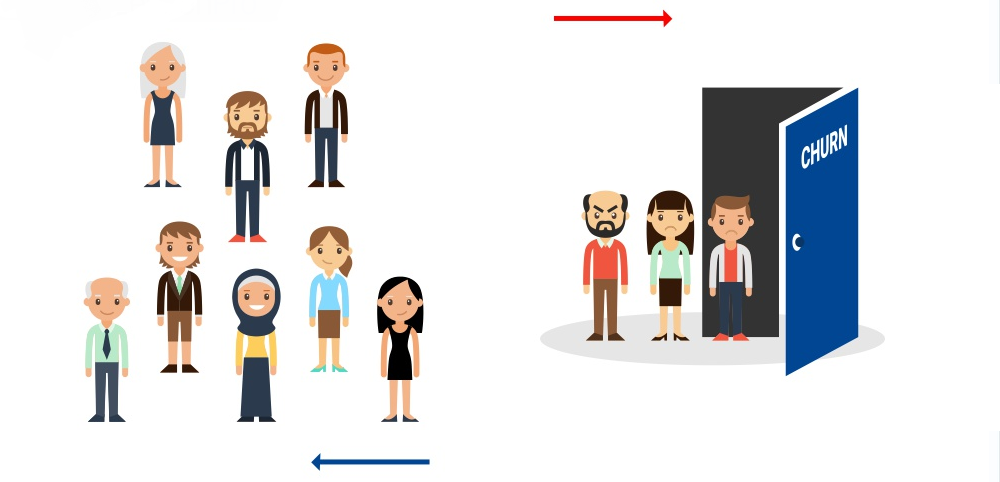

### Objectif : 
The aim of this project is to create a predictive model to identify the set of customers who have a high probability of unsubscribing from the service now or in the near future using Personal Details, Demographic Information, Pricing and the Plans they have subscribed to. A secondary objective is to identify the features of the Independent Variables (also known as “X” or “Predictors”) which cause a great impact on the Dependent Variable (“Y” or “Outcome”) that causes a customer to unsubscribe.

In [2]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the global default size of matplotlib figures
plt.rc('figure', figsize=(8, 6))

# size of matplotlib figures that contain subplots
fizsize_with_subplots = (8, 6)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

pd.pandas.set_option("display.max_columns",None)

## Data Exploration/Analysis Phase

Main aim is to understand more about the data, to apply data preprocessing and preparation techniques in order to obtain clean data.

### Checklist

* **Target variable (binary):** Churn: 26.45% Yes, 73.55% No.

* **Rows & columns:** 7043 rows, 21 columns.

* **Type of variables:** quantitative: 3, qualitative: 18.

* **Missing values:** 

    - Only `TotalCharges` column with 11 null values. 

In [3]:
# import the data 
df = pd.read_csv('customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [5]:
# check total number of rows and columns in our dataset
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  7043
Number of columns:  21


In [6]:
# data details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


From the above data info we can see that `totalcharges` is in object type although it is a numerical feature so let's convert it into numeric variable.

In [7]:
# convert 'totalcharges' column to the correct types
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')

`seniorcitizen` column is supposed to be in object type since it is a categorical variable.

In [8]:
# replace values
df["seniorcitizen"] = df["seniorcitizen"].replace({1:"Yes",0:"No"})

In [9]:
# check data types
df.dtypes.value_counts()

object     18
float64     2
int64       1
dtype: int64

In [10]:
# data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [11]:
# drop irrelevant features
if 'customerid' in df.columns:
    #df.drop('customerid', axis=1, inplace=True)
    df.drop('customerid', axis='columns', inplace=True)

### Check for missing values

In [12]:
df.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

Here the `totalcharges` column has 11 missing values.

In [13]:
df.loc[df.totalcharges.isnull(), ['seniorcitizen','tenure','totalcharges','churn']]

,seniorcitizen,tenure,totalcharges,churn
488,No,0,NaN,No
753,No,0,NaN,No
936,No,0,NaN,No
1082,No,0,NaN,No
1340,No,0,NaN,No
3331,No,0,NaN,No
3826,No,0,NaN,No
4380,No,0,NaN,No
5218,No,0,NaN,No
6670,No,0,NaN,No


From the above table we deduct that customers with null totalcharges seems to be new customers. So here we can just replace NaN values with 0. 

In [14]:
df.totalcharges.fillna(0, inplace=True)

### Check for duplicates

In [15]:
df.duplicated().sum()

22

We have 22 duplicated rows, so we're going to delete them.

In [16]:
# drop duplicated rows in dataset
df.drop_duplicates(inplace=True, ignore_index=True)

### Target variable: churn

In [17]:
df.churn.value_counts()

No     5164
Yes    1857
Name: churn, dtype: int64

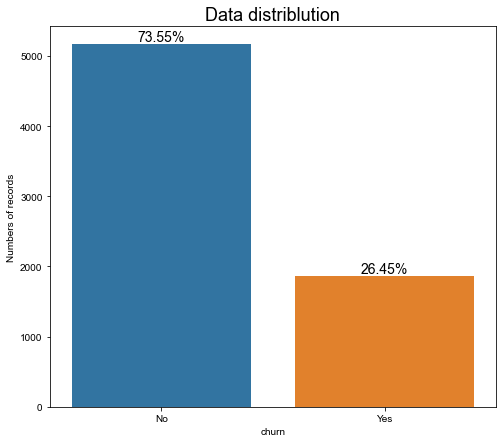

In [18]:
fig=plt.figure(figsize=(8,7))
p= sns.countplot(x='churn', data=df)
ax=plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height+2, '{:.2f}%'.format(100*(height/df.shape[0])),
            fontsize=14,ha='center',va='bottom')
sns.set(font_scale=1.5)
ax.set_ylabel("Numbers of records")
plt.title("Data distriblution");

**Observations :** 

* As we can see from the plot above, about 74% didn't churn and 26% end up churning and our dataset seems to be imbalenced.

### Numerical data analysis

Let us examine numerical features in the dataset.

In [19]:
# list of numerical columns
numeric_features = df.select_dtypes(include=[np.number]).columns.to_list()
numeric_features

['tenure', 'monthlycharges', 'totalcharges']

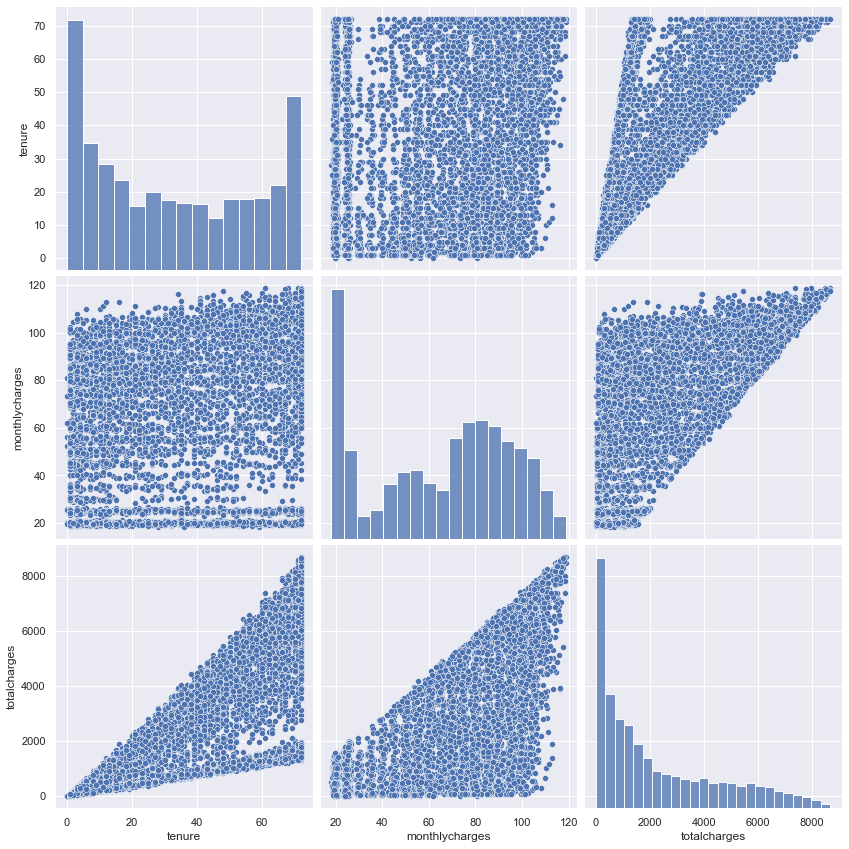

In [20]:
# plot pairplot for numerical features
sns.set()
sns.pairplot(df[numeric_features], size = 4)
plt.show()

**Observations :**

From the pairplot above we can see that:

* `tenure` follow a bimodal distribution. First bulk represents the most of customer who still be new and haven't been in the company for a long time.The second one represents the older customers who have been in the company for the longer time.
* `monthlycharges` as well is roughly bimodal distributed and show that most customers have the lowest monthly charges.
* `totalcharges` is right skewed, there are lot of customers with lower total charges, but fewer with very large balance.
* `tenure` and `totalcharges` seems to be strongly linear.

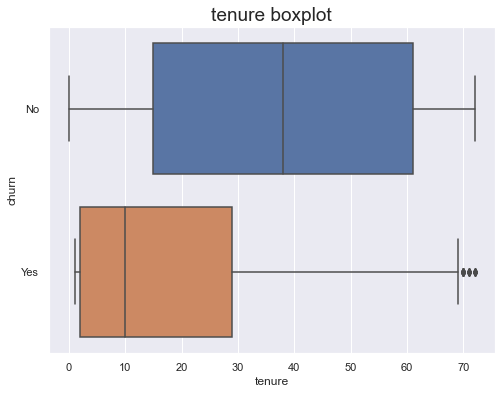

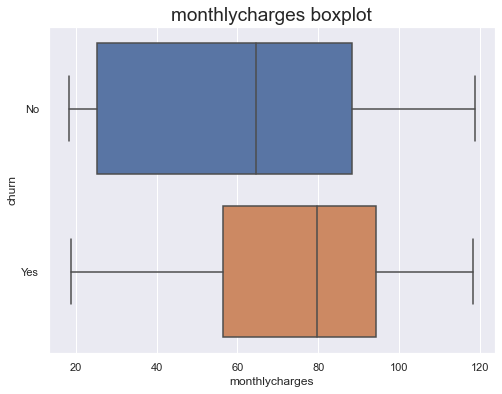

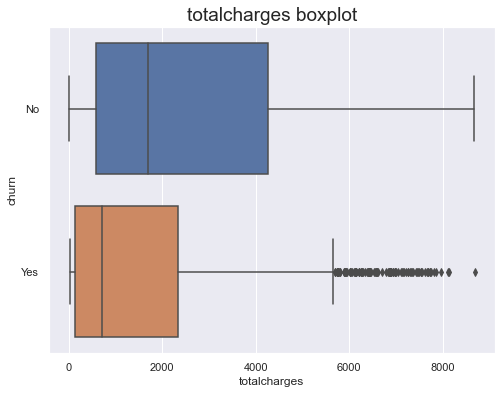

In [21]:
# plot boxplot for each numerical variable
for feature in numeric_features:
    sns.boxplot(x=feature, y='churn', data=df, orient='h')
    plt.title('{} boxplot'.format(feature), fontsize=19)
    plt.show()

**Observations:**
* By looking at the graph of montly charges it seems that the more charges the customers have the more likely they would churn.
* From the boxplot above we see that 75% from chrned customers have the tenure less than 30 and monthly charges more than 57. 

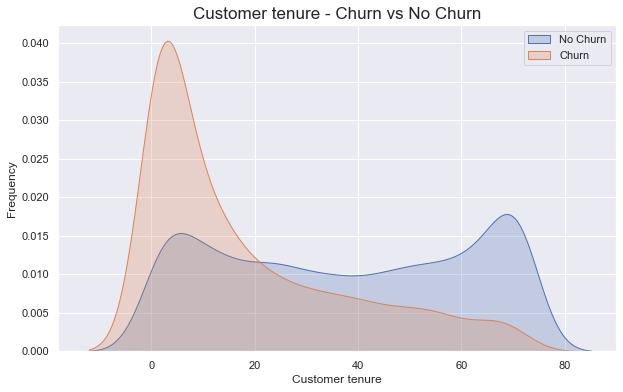

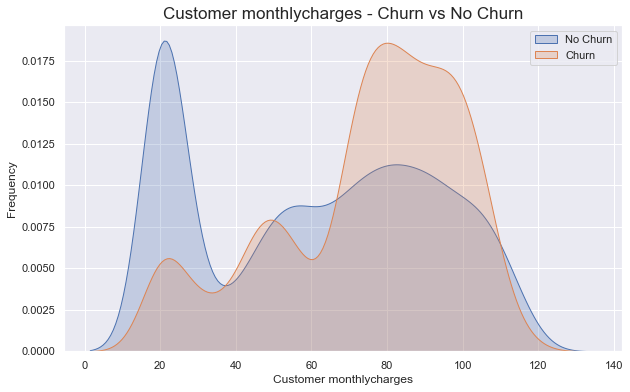

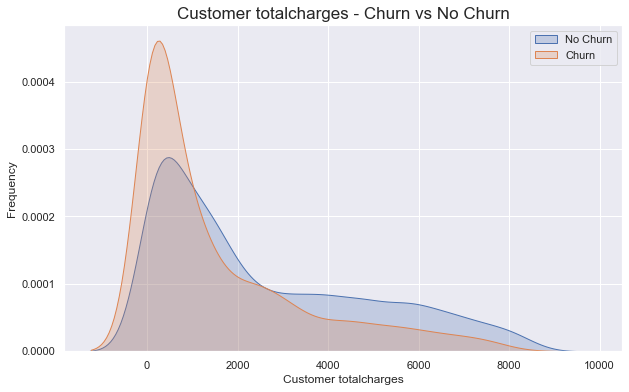

In [22]:
# plot kde for each of the numerical variable 
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    ax=sns.kdeplot(df.loc[(df['churn']=='No'),feature], shade=True, label='No Churn')
    ax=sns.kdeplot(df.loc[(df['churn']=='Yes'),feature], shade=True, label='Churn')
    ax.set(xlabel='Customer {}'.format(feature),ylabel='Frequency')  
    ax.legend()
    plt.title('Customer {} - Churn vs No Churn'.format(feature), fontsize=17)
    plt.show();

**Hypothesis Testing:**

* It seems that customers who have less tenure are more likely to end up churning than older customers.
    - H0= No difference in tenure between churned and no churned customers.
    - Ha= The difference in tenure between churned and no churned customers is significant.




=> Here we are goning to use statistical tests to figure out wether the difference between churned and not churned customers is significant or not.

In [23]:
# get sample of churned and no churned customers for the test
noChurned_customerSample = df[df.churn=='No'].sample(df[df.churn=='Yes'].shape[0])
Churned_customerSample = df[df.churn=='Yes']

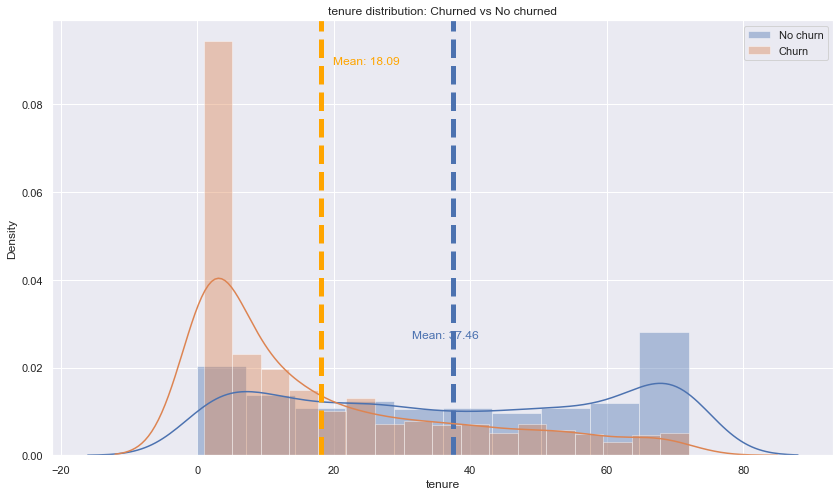

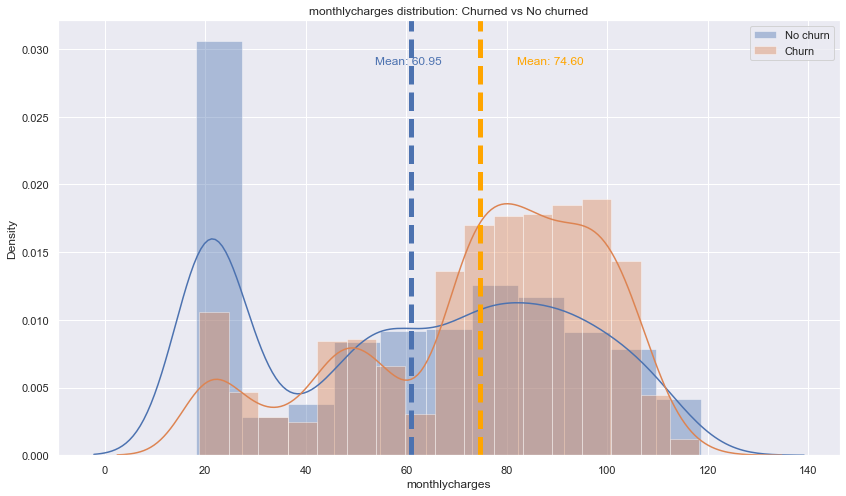

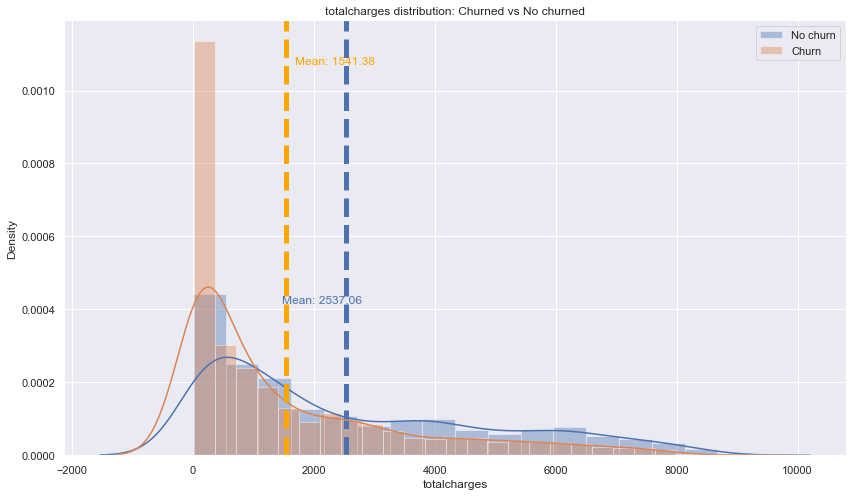

In [24]:
def plot_distribution(feature):
    plt.figure(figsize=(14,8))
    ax = sns.distplot(noChurned_customerSample[feature], label='No churn')
    plt.axvline(np.mean(noChurned_customerSample[feature]), color="b", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        noChurned_customerSample[feature].mean() + noChurned_customerSample[feature].mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(noChurned_customerSample[feature].mean()),
        ha= 'right', color="b"
    )
    
    ax = sns.distplot(Churned_customerSample[feature], label='Churn')
    plt.axvline(np.mean(Churned_customerSample[feature]), color="orange", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        Churned_customerSample[feature].mean() + Churned_customerSample[feature].mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(Churned_customerSample[feature].mean()),
        color="orange"
    )
    plt.title('{} distribution: Churned vs No churned'.format(feature))
    ax.legend()
    return plt.figure

for feature in numeric_features:
    plot_distribution(feature)

**Student t-test**

In [25]:
from scipy.stats import ttest_ind

def t_test(column):
    alpha = 0.05
    stat, p = ttest_ind(noChurned_customerSample[column].dropna(), Churned_customerSample[column].dropna())
    if p < alpha:
        return ('%.3f H0 rejected' % p)
    else:
        return 'H0 not rejected'

In [26]:
for feature in numeric_features:
    print(f'{feature :-<20} {t_test(feature)}')

tenure-------------- 0.000 H0 rejected
monthlycharges------ 0.000 H0 rejected
totalcharges-------- 0.000 H0 rejected


**Result interpretation:**
* So it's evident that `tenure`, `monthlycharges` and `totalcharges` have significant diffrences between churned and no cherned customers. (Both means are evidently different from each other)

### Categorical data analysis

Let's examine categorical features in our dataset.

In [27]:
# list of numerical columns
cat_features = df.select_dtypes(include=['object']).columns.to_list()
cat_features.remove('churn')
cat_features

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [28]:
def cat_plot(feature):
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(17,7))
    
    plt.subplot(121)  
    axe=sns.countplot(x=feature, data=df)
    axe.set_xlabel(feature, fontsize = 18)
    axe.set_xticklabels(axe.get_xticklabels(), rotation=45, fontsize=14)
    axe.set_ylabel('count of {}'.format(feature), fontsize = 18)
    ax=plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height+2, '{:.2f}%'.format(100*(height/df[df.churn=='Yes'].shape[0])),
                fontsize=12,ha='center',va='bottom')
    sns.set(font_scale=1.5)
    plt.title('Churned customers by {}'.format(feature), fontweight="bold")
    
    plt.subplot(122)
    axe=sns.countplot(x=feature, data=df, hue='churn', color='r')
    axe.set_xlabel(feature, fontsize = 18)
    axe.set_xticklabels(axe.get_xticklabels(), rotation=45, fontsize=14)
    axe.set_ylabel('count of {}'.format(feature), fontsize = 18)
    #sns.set(font_scale=1.5)
    plt.title('Customers by {} Churn vs No churn'.format(feature), fontweight="bold")
    ;

Let’s check how categorical variables are related to customer churn.

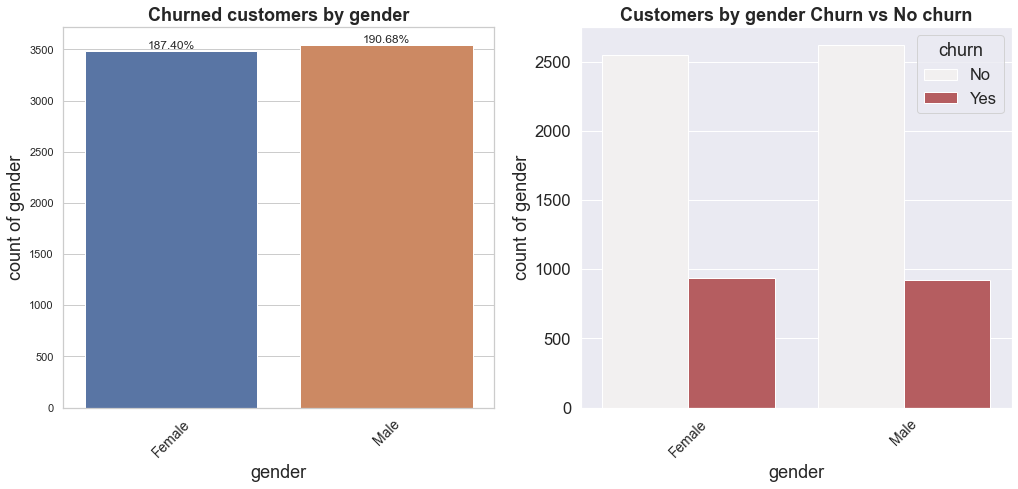

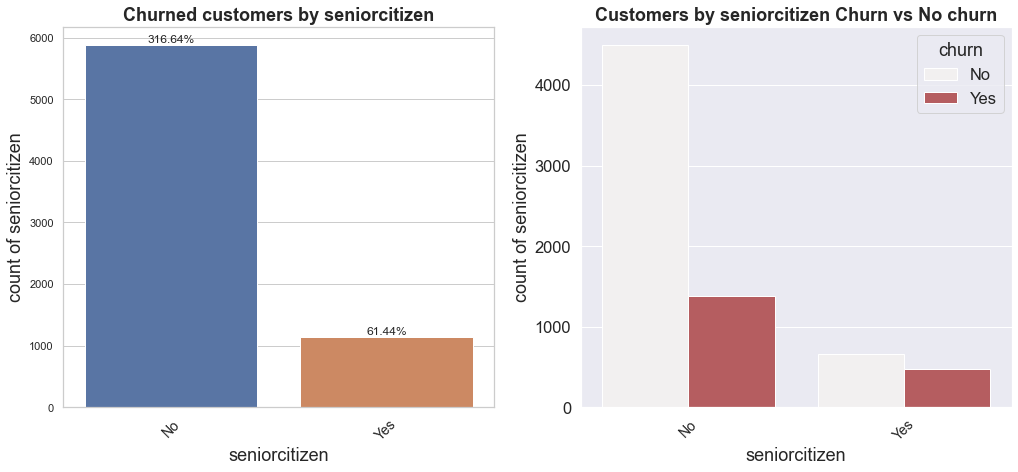

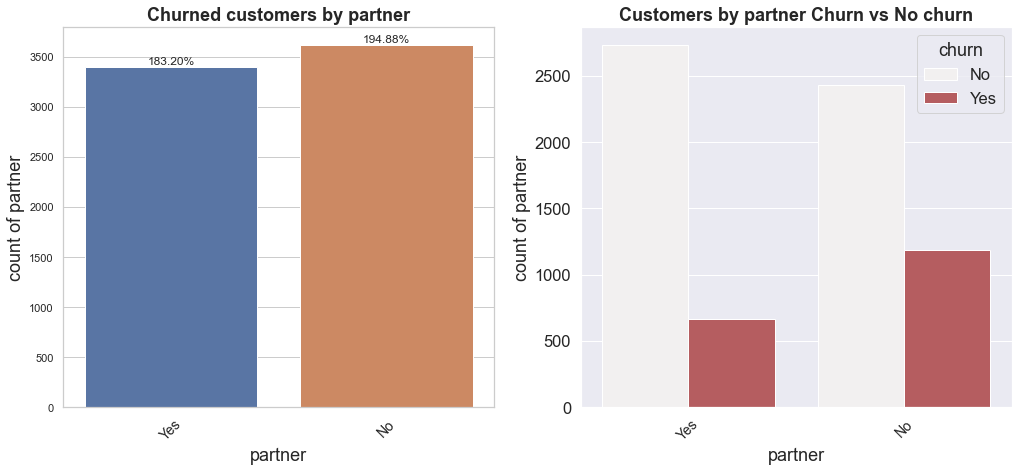

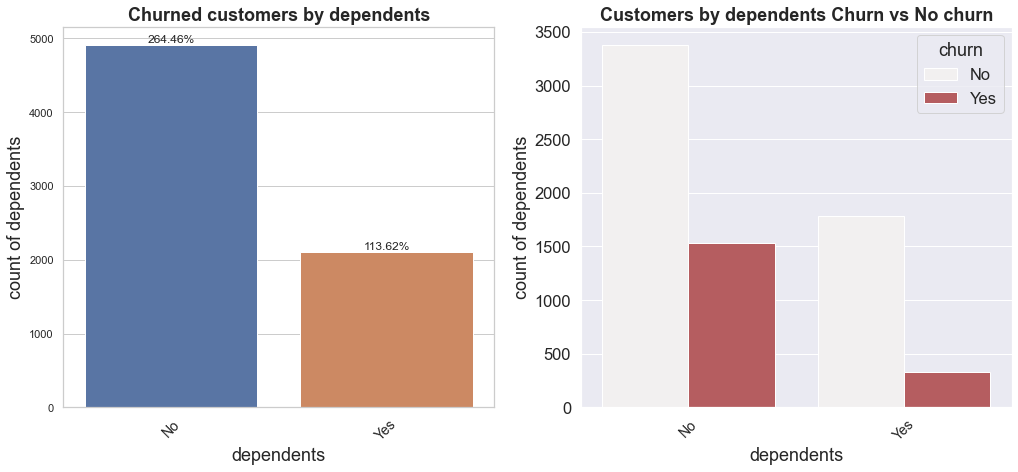

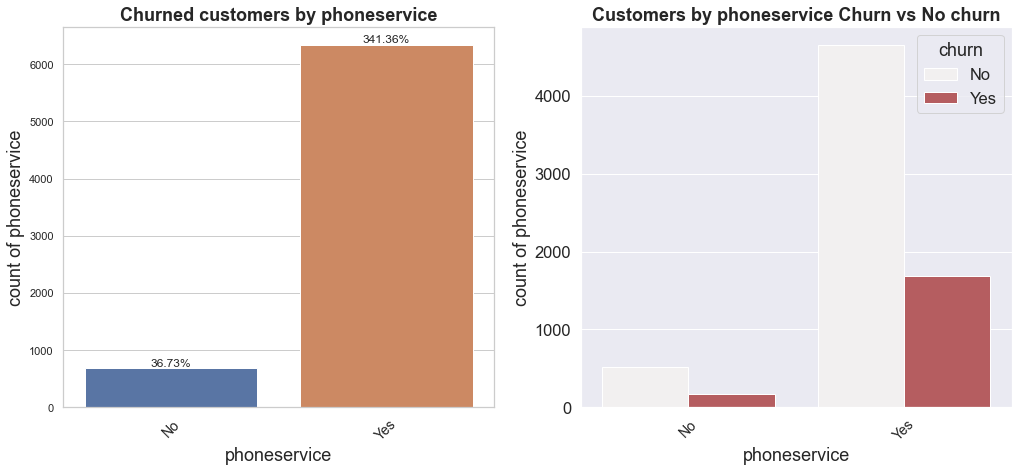

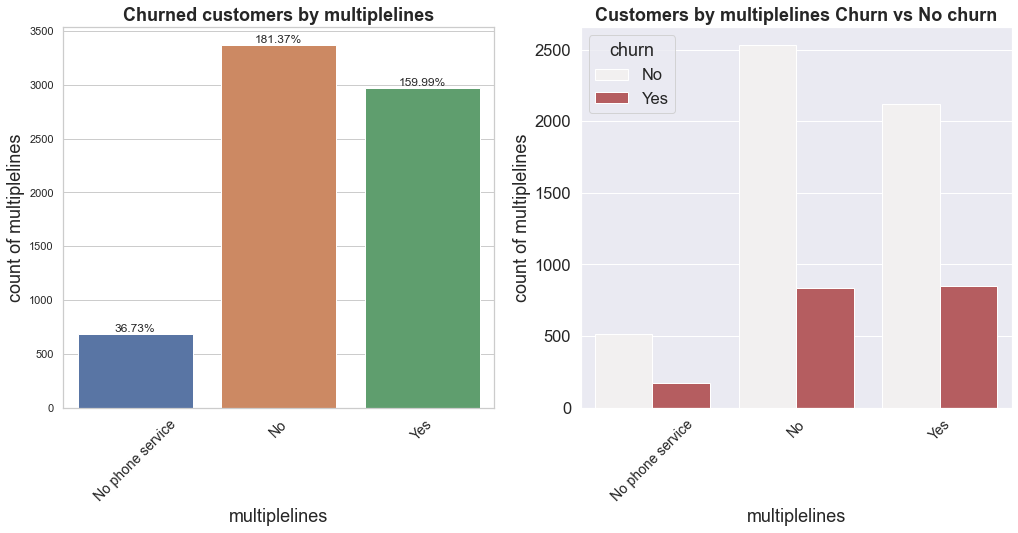

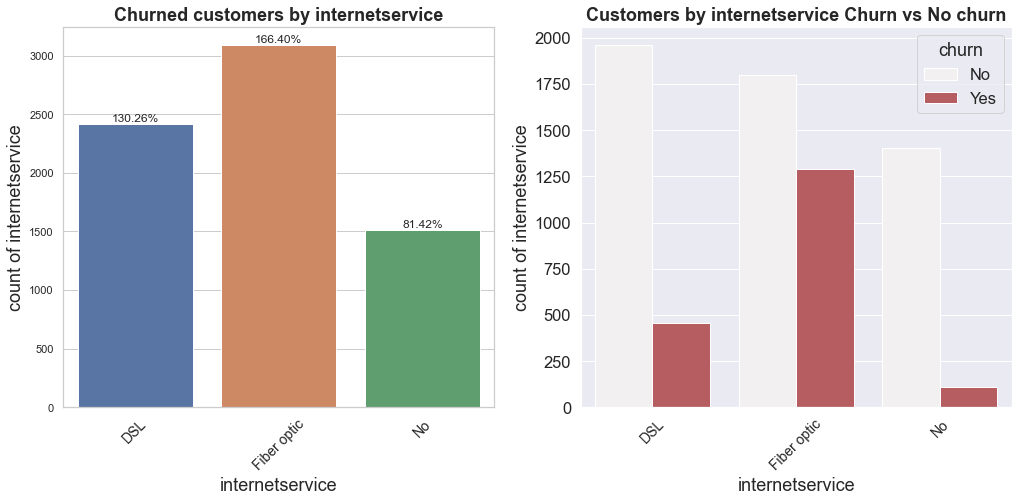

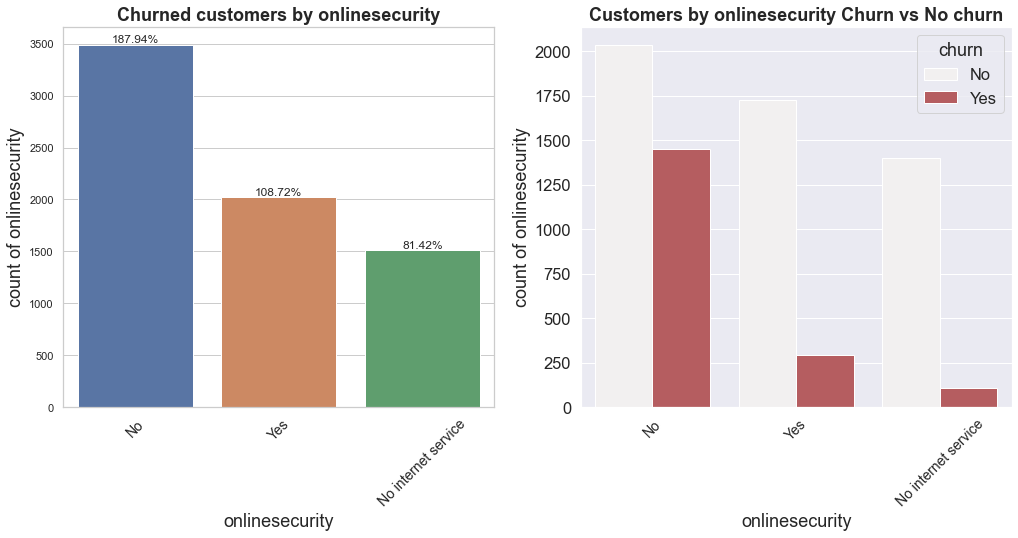

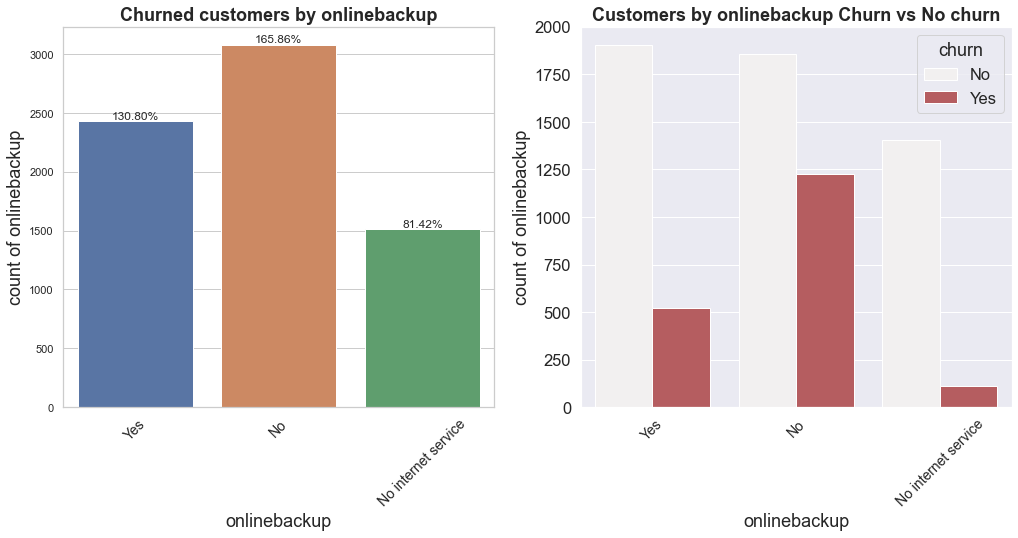

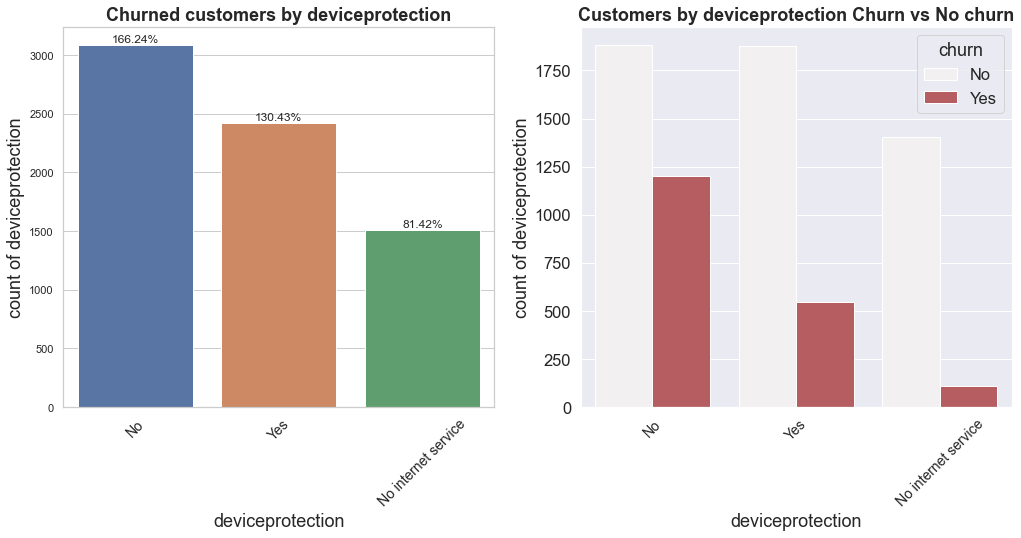

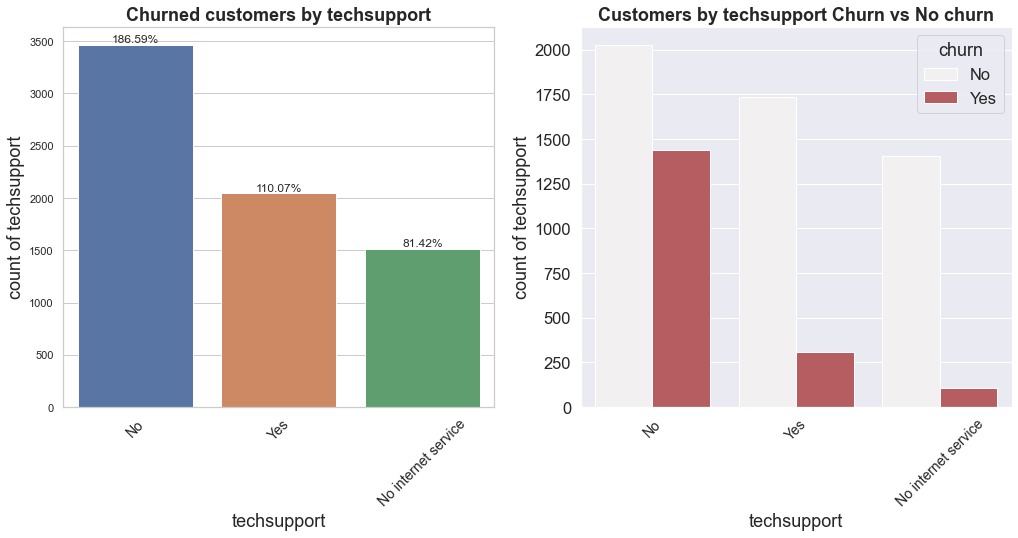

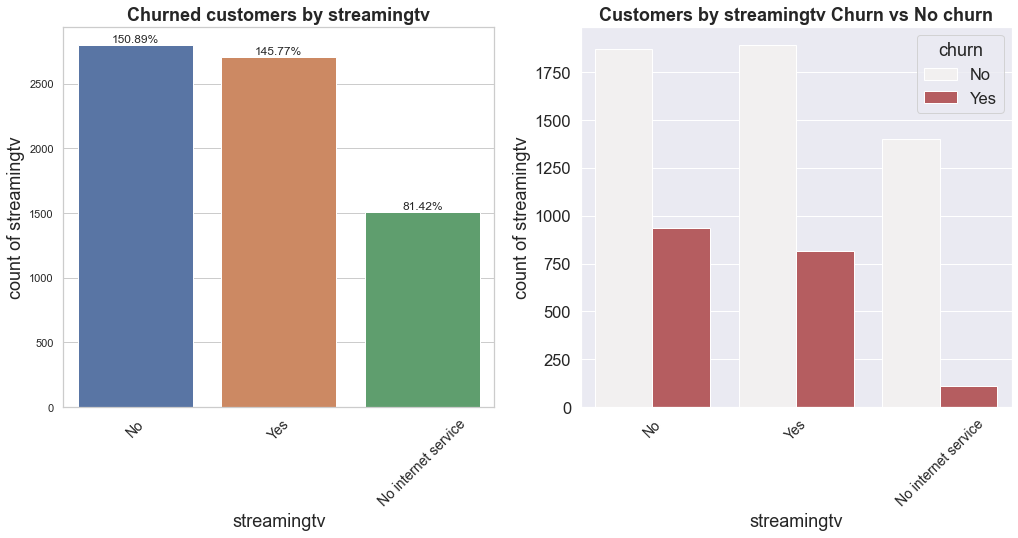

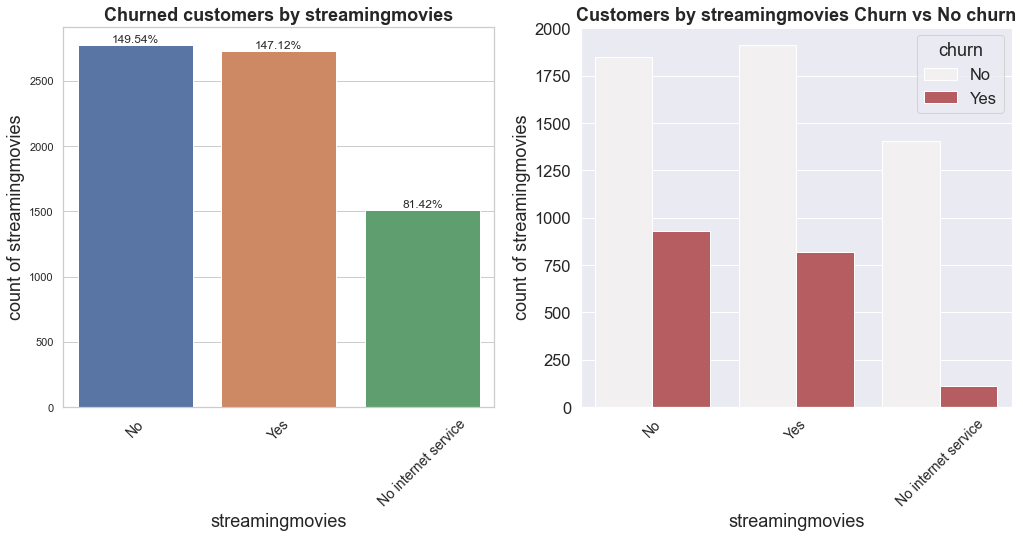

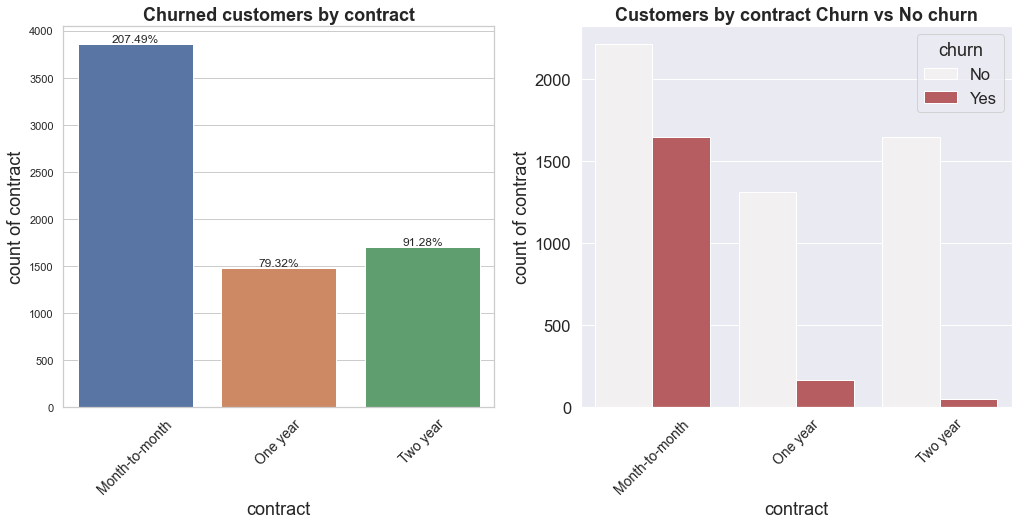

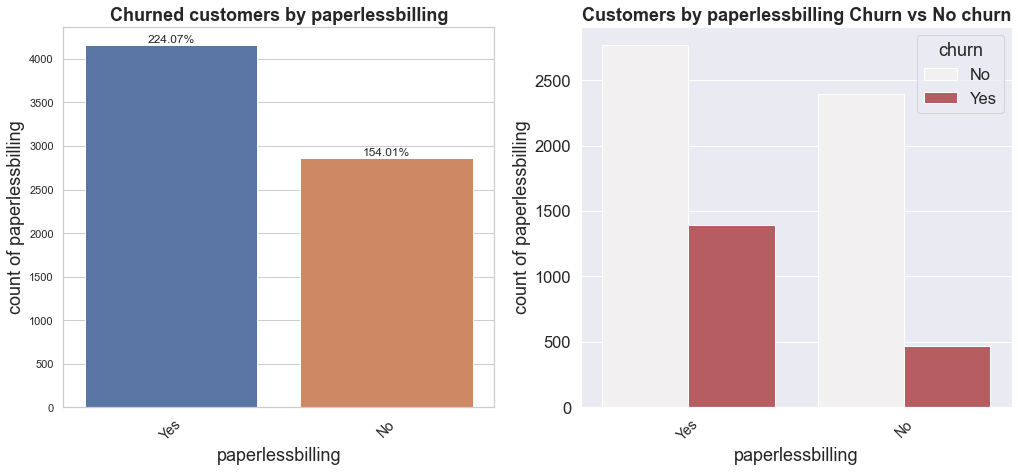

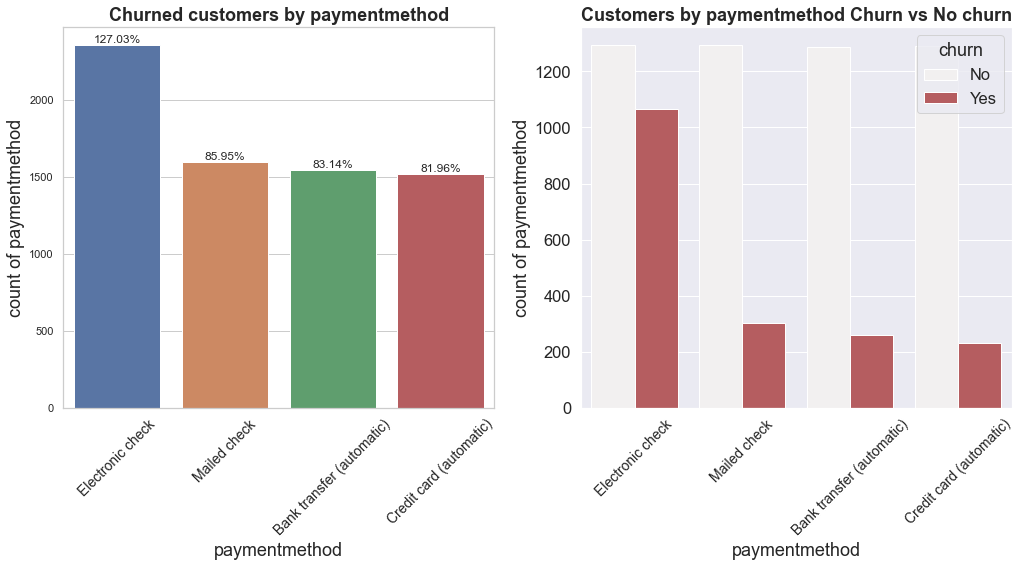

In [29]:
# review the relation between the target 'churn' and the categorival features
for feature in cat_features:
    cat_plot(feature)

### Multicollinearity

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the `corr` function from the pandas dataframe library. We will use the `heatmap` function from the seaborn library to plot the correlation matrix.

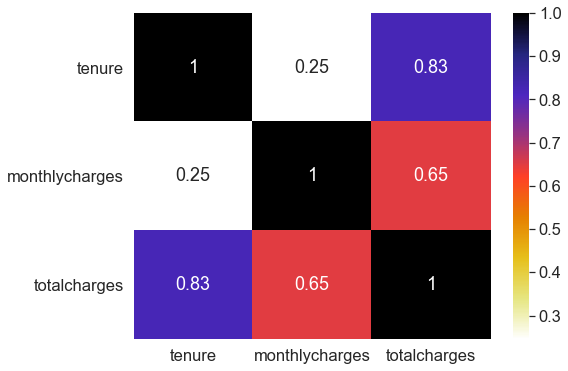

In [30]:
cor = df[numeric_features].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**Observations :**
* From the correlation matrix we find that `tenure` and `totalcharges` are highly correlated with 0.83 and this seems to be logical since the more the customer stay with the company the more totalcharges he will get so we can simlpy remove one of them to avoid multicollinearity.

## Encoding-TrainTest

In [32]:
# dummy the categorical features
target = df['churn'].replace({"Yes":1,"No":0})
data = df.drop('churn', axis=1)
data = pd.get_dummies(data, drop_first=True)  
dataframe = pd.concat([data,target], axis=1)

In [33]:
from sklearn.model_selection import train_test_split

# train test split
trainset, testset = train_test_split(dataframe, test_size=0.2, random_state=0)
print('trainset: ',trainset.shape)
print('testset: ', testset.shape)

trainset:  (5616, 31)
testset:  (1405, 31)
